In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


In [3]:
os.listdir()

['Ult_proyecto.ipynb']

In [4]:
df = pd.read_csv(r"..\data\NHANES_age_prediction.csv")
df

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


In [5]:
df.rename(columns={
    'SEQN': 'Sequence_Number',
    'age_group': 'Age_Group',
    'RIDAGEYR': 'Age_Years',
    'RIAGENDR': 'Gender',
    'PAQ605': 'Physical_Activity',
    'BMXBMI': 'Body_Mass_Index',
    'LBXGLU': 'Glucose_Level',
    'DIQ010': 'Diabetes_Indicator',
    'LBXGLT': 'Glycohemoglobin_Level',
    'LBXIN': 'Insulin_Level'
}, inplace=True)

In [6]:
df.head()

,Sequence_Number,Age_Group,Age_Years,Gender,Physical_Activity,Body_Mass_Index,Glucose_Level,Diabetes_Indicator,Glycohemoglobin_Level,Insulin_Level
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sequence_Number        2278 non-null   float64
 1   Age_Group              2278 non-null   object 
 2   Age_Years              2278 non-null   float64
 3   Gender                 2278 non-null   float64
 4   Physical_Activity      2278 non-null   float64
 5   Body_Mass_Index        2278 non-null   float64
 6   Glucose_Level          2278 non-null   float64
 7   Diabetes_Indicator     2278 non-null   float64
 8   Glycohemoglobin_Level  2278 non-null   float64
 9   Insulin_Level          2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [8]:
df["Physical_Activity"].value_counts

<bound method IndexOpsMixin.value_counts of 0       2.0
1       2.0
2       2.0
3       2.0
4       1.0
       ... 
2273    2.0
2274    2.0
2275    2.0
2276    2.0
2277    2.0
Name: Physical_Activity, Length: 2278, dtype: float64>

In [9]:
# Elimo outlier

df = df.loc[df.Physical_Activity!=7,:]

In [10]:
df["Physical_Activity"].value_counts()

# 2 Representa que no hacen ejercicio.

Physical_Activity
2.0    1868
1.0     409
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

# Usamos LabelEncoder para no aumentar la dimensionalidad.
label_encoder = LabelEncoder()

# Convertir la columna age_group a una categoría binaria
df['Physical_Activity'] = label_encoder.fit_transform(df['Physical_Activity'])

C:\Users\vipre\AppData\Local\Temp\ipykernel_8012\516594049.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Physical_Activity'] = label_encoder.fit_transform(df['Physical_Activity'])


In [12]:
df["Physical_Activity"].value_counts()

Physical_Activity
1    1868
0     409
Name: count, dtype: int64

In [13]:
correlacion = df.drop(columns=["Age_Group"]).corr()
correlacion

,Sequence_Number,Age_Years,Gender,Physical_Activity,Body_Mass_Index,Glucose_Level,Diabetes_Indicator,Glycohemoglobin_Level,Insulin_Level
Sequence_Number,1.000000,-0.008588,-0.013462,-0.013976,-0.061827,-0.003867,0.014064,0.005537,-0.040421
Age_Years,-0.008588,1.000000,0.006605,0.024286,0.147389,0.229534,0.049990,0.318344,-0.091739
Gender,-0.013462,0.006605,1.000000,0.163096,0.063475,-0.132120,-0.032816,0.016946,-0.017018
Physical_Activity,-0.013976,0.024286,0.163096,1.000000,-0.039022,-0.011618,-0.002182,0.068964,0.015036
Body_Mass_Index,-0.061827,0.147389,0.063475,-0.039022,1.000000,0.208629,0.047106,0.193026,0.552575
Glucose_Level,-0.003867,0.229534,-0.132120,-0.011618,0.208629,1.000000,-0.004405,0.686061,0.212156
Diabetes_Indicator,0.014064,0.049990,-0.032816,-0.002182,0.047106,-0.004405,1.000000,0.009758,0.058964
Glycohemoglobin_Level,0.005537,0.318344,0.016946,0.068964,0.193026,0.686061,0.009758,1.000000,0.216995
Insulin_Level,-0.040421,-0.091739,-0.017018,0.015036,0.552575,0.212156,0.058964,0.216995,1.000000


<Axes: >

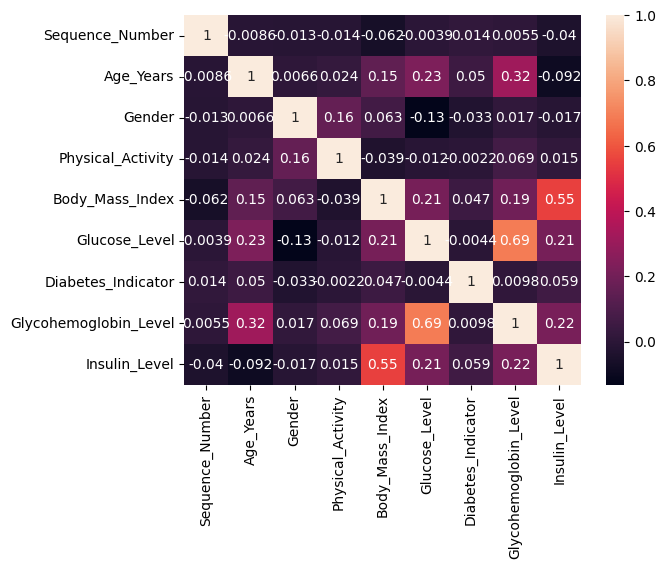

In [14]:
sns.heatmap(data=correlacion, annot=True)

In [15]:
y = df["Physical_Activity"]

In [16]:
X = df.drop(["Sequence_Number", "Age_Group", "Physical_Activity"], axis=1)

In [17]:
X.head()

,Age_Years,Gender,Body_Mass_Index,Glucose_Level,Diabetes_Indicator,Glycohemoglobin_Level,Insulin_Level
0,61.0,2.0,35.7,110.0,2.0,150.0,14.91
1,26.0,2.0,20.3,89.0,2.0,80.0,3.85
2,16.0,1.0,23.2,89.0,2.0,68.0,6.14
3,32.0,1.0,28.9,104.0,2.0,84.0,16.15
4,38.0,2.0,35.9,103.0,2.0,81.0,10.92


In [18]:
# Cojo la estrategia de OVERSAMPLING para balancear el dataset

from imblearn.over_sampling import SMOTE, RandomOverSampler

In [19]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Distribución balanceada clases')

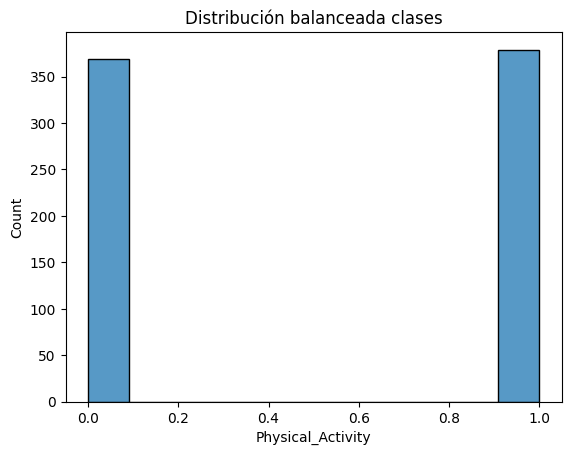

In [21]:
# Observamos que el oversampling balancea las clases

sns.histplot(y_test)
plt.title('Distribución balanceada clases')


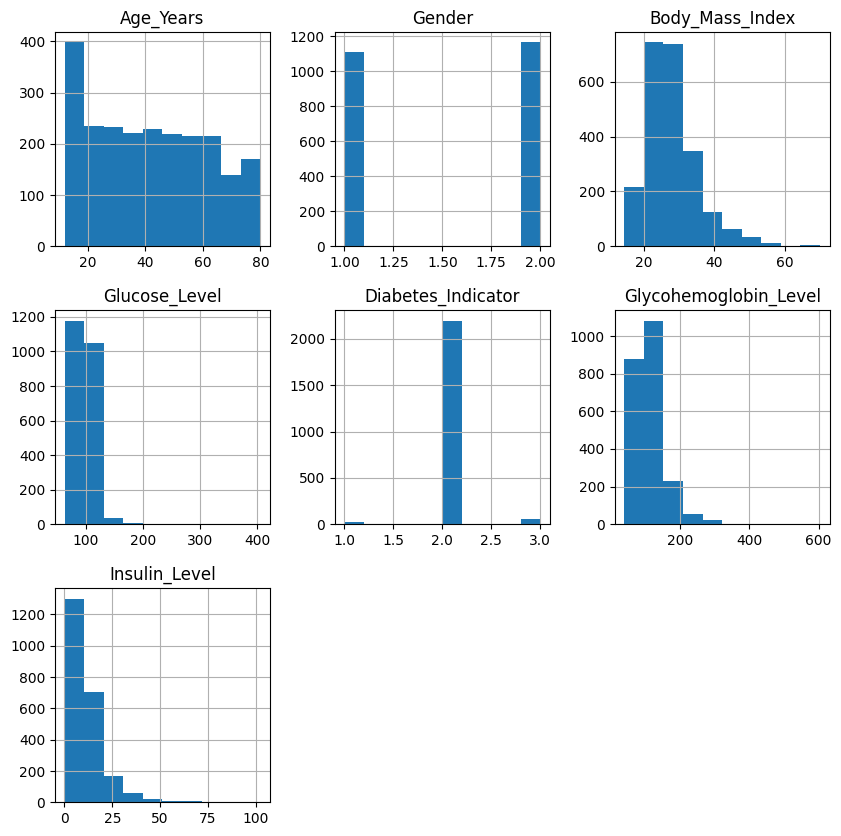

In [22]:
X.hist(figsize=(10,10))
plt.tight_layout
plt.show()



# Podemos observar que las variables están bastante normalizadas, excepto las categóricas. Que no nos interesan

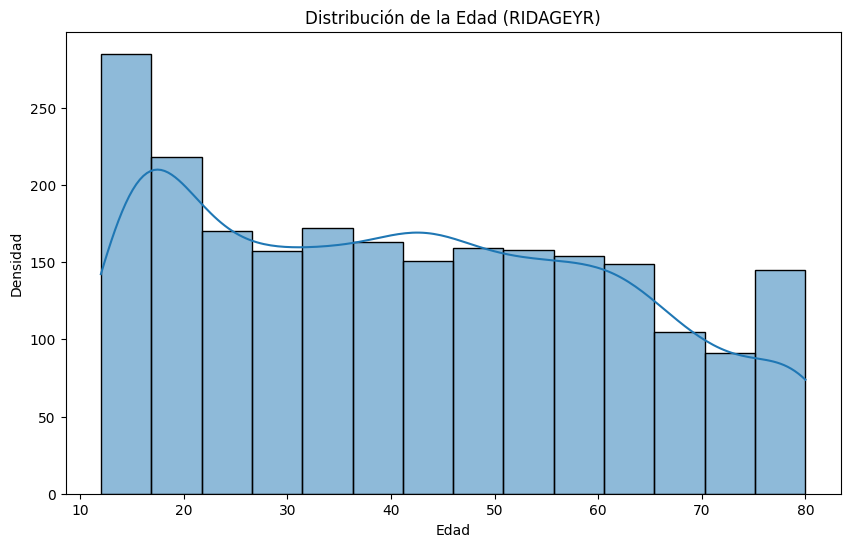

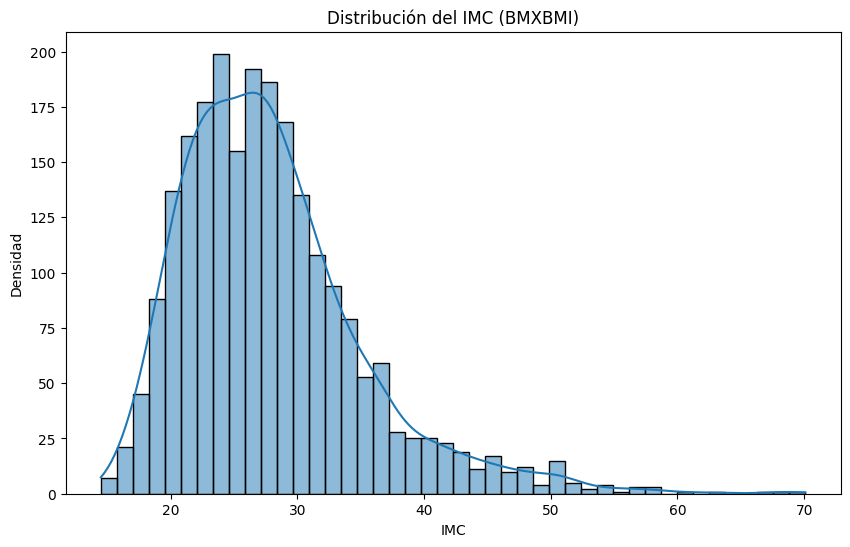

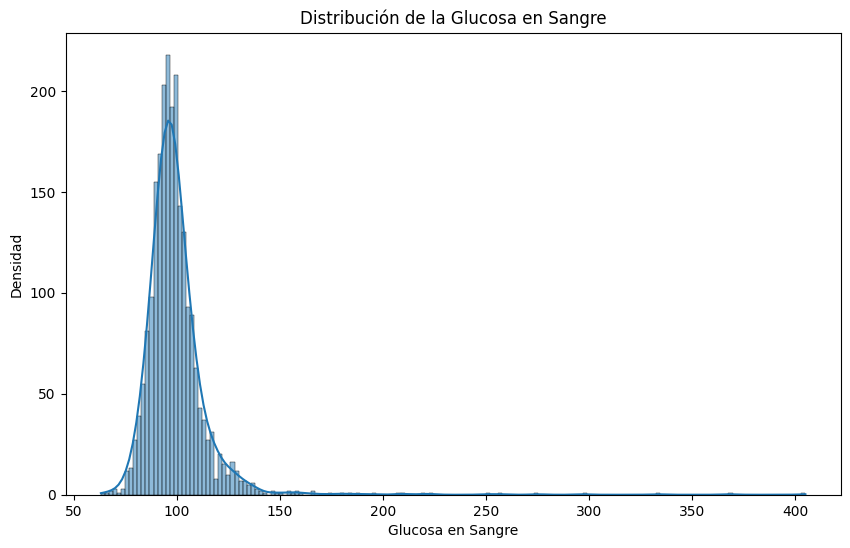

In [23]:
# Age_Years
plt.figure(figsize=(10, 6))
sns.histplot(df['Age_Years'], kde=True)
plt.title('Distribución de la Edad (RIDAGEYR)')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

# Body_Mass_Index
plt.figure(figsize=(10, 6))
sns.histplot(df['Body_Mass_Index'], kde=True)
plt.title('Distribución del IMC (BMXBMI)')
plt.xlabel('IMC')
plt.ylabel('Densidad')
plt.show()

# Glucose_Level
plt.figure(figsize=(10, 6))
sns.histplot(df['Glucose_Level'], kde=True)
plt.title('Distribución de la Glucosa en Sangre')
plt.xlabel('Glucosa en Sangre')
plt.ylabel('Densidad')
plt.show()

Voy a probar manualmente dos modelos, simplemente para comparar depués los resultados 
de los pipeslines y sus respectivos gridsearchs con diferentes hiperparámetros.

### RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight="balanced")


rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [25]:
rf.score(X_test, y_test)

0.9411764705882353

In [26]:
predictions = rf.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[362,   7],
       [ 37, 342]], dtype=int64)

In [28]:
from sklearn.preprocessing import StandardScaler

std_scaled = StandardScaler()

std_scaled.fit(X_train)
X_train_scaled = std_scaled.transform(X_train)
X_test_scaled = std_scaled.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression 

l_reg =LogisticRegression()

l_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [30]:
predictions = l_reg.predict(X_test)
predictions

c:\Users\vipre\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [31]:
l_reg.score(X_test_scaled, y_test)

0.6283422459893048

In [32]:
l_reg.predict_proba(X_test_scaled)

array([[0.75367187, 0.24632813],
       [0.52486645, 0.47513355],
       [0.6527142 , 0.3472858 ],
       ...,
       [0.38878657, 0.61121343],
       [0.58211804, 0.41788196],
       [0.60458069, 0.39541931]])

Definimos Pipelines para comparar difierentes modelos y saber cuál es el menor. Ojo, haré las pruebas por separado con cada gridsearch para no saturar el pc

In [33]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold



# Crear el pipeline
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('classifier', LogisticRegression())  # Modelo base
])

# Definir los parámetros para la búsqueda en GridSearchCV
logistic_params = {
    'classifier': [LogisticRegression()],
}

random_forest_params = {
    'classifier': [RandomForestClassifier()]
}

dt_clf_params = {
    'classifier': [DecisionTreeClassifier()]
}

knc_params = {
    'classifier': [KNeighborsClassifier()]
}

xgb_params = {
    'classifier': [XGBClassifier()]
}

ada_params = {
    'classifier': [AdaBoostClassifier()]
}

search_models = [
    logistic_params,
    random_forest_params,
    dt_clf_params,
    knc_params,
    xgb_params,
    ada_params
]

# Definir la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear el GridSearchCV
clf = GridSearchCV(estimator=pipe,
                   param_grid=search_models,
                   n_jobs=-1,
                   cv=cv,
                   scoring='balanced_accuracy')

# Ajustar el GridSearchCV
clf.fit(X_train, y_train)



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()]},
                         {'classifier': [RandomForestClassifier()]},
                         {'classifier': [DecisionTreeClassifier()]},
                         {'classifier': [KNeighborsClassifier()]},
                         {...
                                                       learning_rate=None,
                                                       max_bin=None,
                                                       max_cat_threshold=None,
                                                       max_cat_to_onehot=None,
                                                       max_delta_step=None,
                                                       max_depth=None,
                                                       max_leaves=None,
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       multi_strategy=None,
                                                       n_estimators=None,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       random_state=None, ...)]},
                         {'classifier': [AdaBoostClassifier()]}],
             scoring='balanced_accuracy')

In [34]:
# Obetenemos el mejor modelo de los varios planteados, esto es sin jugar con los hiperparametros

best_model = clf.best_estimator_
print(f"Mejor modelo: {best_model}")

# Por ahora el mejor modelo sería el randomforest

y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy mejor modelo: {test_accuracy:.4f}')

Mejor modelo: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])
Accuracy mejor modelo: 0.9412


## Logistic Regression

In [35]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('classifier', LogisticRegression(max_iter=1000))  # Modelo base
])

# Definir los parámetros para la búsqueda en GridSearchCV
logistic_params = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['lbfgs', 'liblinear', 'saga']
}

# Definir la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear el GridSearchCV
clf = GridSearchCV(estimator=pipe,
                   param_grid=logistic_params,
                   n_jobs=-1,
                   cv=cv,
                   scoring='balanced_accuracy')

# Ajustar el GridSearchCV
clf.fit(X_train, y_train)

c:\Users\vipre\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
175 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\vipre\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\vipre\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\vipre\anaconda3\envs\ML\Lib\site-packages\sklearn\pipeline.py", line 475, in

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 'none'],
                         'classifier__solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='balanced_accuracy')

In [36]:
logistic_best = clf.best_estimator_
print(f"Mejor modelo: {logistic_best}")

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = logistic_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy mejor modelo LogisticRegression: {test_accuracy:.4f}')

Mejor modelo: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=0.1, max_iter=1000))])
Accuracy mejor modelo LogisticRegression: 0.6243


In [37]:
# Generar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("\nReporte de clasificación:\n", report)



Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.61      0.64      0.63       369
           1       0.64      0.60      0.62       379

    accuracy                           0.62       748
   macro avg       0.62      0.62      0.62       748
weighted avg       0.62      0.62      0.62       748



In [38]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm

array([[238, 131],
       [150, 229]], dtype=int64)

## RandomForestClassifier

In [39]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('classifier', RandomForestClassifier(random_state=42))  # Modelo base
])

# Definir los parámetros para la búsqueda en GridSearchCV
rf_params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__class_weight': ['balanced', 'balanced_subsample']

}

# Definir la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear el GridSearchCV
clf = GridSearchCV(estimator=pipe,
                   param_grid=rf_params,
                   n_jobs=-1,
                   cv=cv,
                   scoring='balanced_accuracy')

# Ajustar el GridSearchCV
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': ['balanced',
                                                      'balanced_subsample'],
                         'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='balanced_accuracy')

In [40]:
random_forest_best = clf.best_estimator_
print(f"Mejor modelo RF: {random_forest_best}")

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = random_forest_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy mejor modelo RandomForestClassifier: {test_accuracy:.4f}')

Mejor modelo RF: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=30, n_estimators=300,
                                        random_state=42))])
Accuracy mejor modelo RandomForestClassifier: 0.9479


In [41]:
report = classification_report(y_test, y_pred)
print("\nReporte de clasificación:\n", report)


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       369
           1       0.98      0.92      0.95       379

    accuracy                           0.95       748
   macro avg       0.95      0.95      0.95       748
weighted avg       0.95      0.95      0.95       748



In [42]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[362,   7],
       [ 32, 347]], dtype=int64)

## DecisionTreeClassifier

In [43]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('classifier', DecisionTreeClassifier(random_state=42))  # Modelo base
])

# Definir los parámetros para la búsqueda en GridSearchCV
dt_params = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__class_weight': ['balanced', None]
}

# Definir la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear el GridSearchCV
clf = GridSearchCV(estimator=pipe,
                   param_grid=dt_params,
                   n_jobs=-1,
                   cv=cv,
                   scoring='balanced_accuracy')

# Ajustar el GridSearchCV
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': ['balanced', None],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 10, 20, 30, 40, 50],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__splitter': ['best', 'random']},
             scoring='balanced_accuracy')

In [44]:
decision_tree_best = clf.best_estimator_
print(f"Mejor modelo: {decision_tree_best}")

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = decision_tree_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy mejor modelo DecisionTreeClassifier: {test_accuracy:.4f}')

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("\nReporte de clasificación:\n", report)

Mejor modelo: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=30,
                                        random_state=42, splitter='random'))])
Accuracy mejor modelo DecisionTreeClassifier: 0.8837

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89       369
           1       0.96      0.80      0.87       379

    accuracy                           0.88       748
   macro avg       0.89      0.88      0.88       748
weighted avg       0.90      0.88      0.88       748



In [45]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[358,  11],
       [ 76, 303]], dtype=int64)

## KNeighborsClassifier

In [46]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('classifier', KNeighborsClassifier())  # Modelo base
])

# Definir los parámetros para la búsqueda en GridSearchCV
knn_params = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Definir la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear el GridSearchCV
clf = GridSearchCV(estimator=pipe,
                   param_grid=knn_params,
                   n_jobs=-1,
                   cv=cv,
                   scoring='balanced_accuracy')

# Ajustar el GridSearchCV
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__metric': ['euclidean', 'manhattan',
                                                'minkowski'],
                         'classifier__n_neighbors': [3, 5, 7, 9],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='balanced_accuracy')

In [47]:
knn_best = clf.best_estimator_
print(f"Mejor modelo: {knn_best}")

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = knn_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy mejor modelo KNeighborsClassifier: {test_accuracy:.4f}')

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("\nReporte de clasificación:\n", report)

Mejor modelo: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3,
                                      weights='distance'))])
Accuracy mejor modelo KNeighborsClassifier: 0.8342

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.76      0.98      0.85       369
           1       0.97      0.69      0.81       379

    accuracy                           0.83       748
   macro avg       0.86      0.84      0.83       748
weighted avg       0.87      0.83      0.83       748



In [48]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[362,   7],
       [117, 262]], dtype=int64)

## XGBClassifier

In [49]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('classifier', XGBClassifier(random_state=42))  # Modelo base
])

# Definir los parámetros para la búsqueda en GridSearchCV
xgb_params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

# Definir la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear el GridSearchCV
clf = GridSearchCV(estimator=pipe,
                   param_grid=xgb_params,
                   n_jobs=-1,
                   cv=cv,
                   scoring='balanced_accuracy')

# Ajustar el GridSearchCV
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      fea...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 6, 9],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='balanced_accuracy')

In [50]:
xgb_best = clf.best_estimator_
print(f"Mejor modelo: {xgb_best}")

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = xgb_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy mejor modelo XGBClassifier: {test_accuracy:.4f}')

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("\nReporte de clasificación:\n", report)

Mejor modelo: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=9, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_s

In [51]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[360,   9],
       [ 47, 332]], dtype=int64)

## AdaBoostClassifier

In [52]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('classifier', AdaBoostClassifier(random_state=42))  # Modelo base
])

# Definir los parámetros para la búsqueda en GridSearchCV
ada_params = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.5, 1, 1.5, 2],
    'classifier__estimator': [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
        DecisionTreeClassifier(max_depth=4),
        DecisionTreeClassifier(max_depth=5)
    ]
}

# Definir la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear el GridSearchCV
clf = GridSearchCV(estimator=pipe,
                   param_grid=ada_params,
                   n_jobs=-1,
                   cv=cv,
                   scoring='balanced_accuracy')

# Ajustar el GridSearchCV
clf.fit(X_train, y_train)

c:\Users\vipre\anaconda3\envs\ML\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        AdaBoostClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__estimator': [DecisionTreeClassifier(max_depth=1),
                                                   DecisionTreeClassifier(max_depth=2),
                                                   DecisionTreeClassifier(max_depth=3),
                                                   DecisionTreeClassifier(max_depth=4),
                                                   DecisionTreeClassifier(max_depth=5)],
                         'classifier__learning_rate': [0.01, 0.1, 0.5, 1, 1.5,
                                                       2],
                         'classifier__n_estimators': [50, 100, 200, 300]},
             scoring='balanced_accuracy')

In [53]:
ada_best = clf.best_estimator_
print(f"Mejor modelo: {ada_best}")

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = ada_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy mejor modelo AdaBoostClassifier: {test_accuracy:.4f}')

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("\nReporte de clasificación:\n", report)

Mejor modelo: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                                    learning_rate=1, n_estimators=300,
                                    random_state=42))])
Accuracy mejor modelo AdaBoostClassifier: 0.9545

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       369
           1       0.97      0.94      0.95       379

    accuracy                           0.95       748
   macro avg       0.95      0.95      0.95       748
weighted avg       0.95      0.95      0.95       748



In [54]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[357,  12],
       [ 22, 357]], dtype=int64)

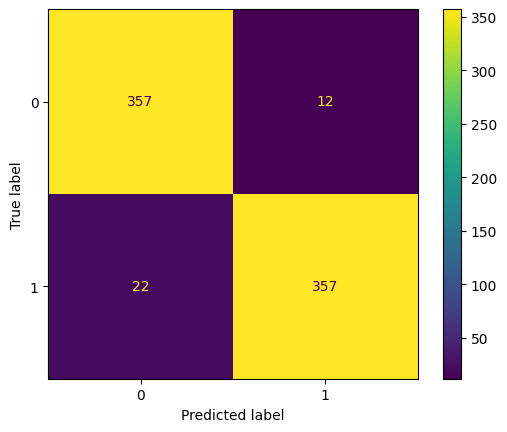

In [55]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

<Axes: >

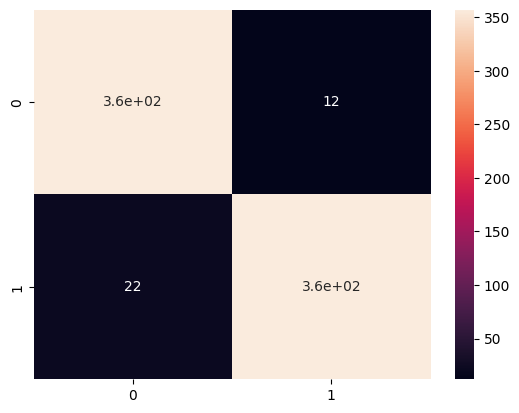

In [56]:
sns.heatmap(cm, annot=True)

## VotingClassifier

In [57]:
voting_clf = VotingClassifier(estimators=[
    ('log_reg', logistic_best),
    ('random_forest', random_forest_best),
    ('decision_tree', decision_tree_best),
    ('knn', knn_best),
    ('xgb', xgb_best),
    ('ada_boost', ada_best)
], voting='soft', n_jobs=-1)


voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('classifier',
                                               LogisticRegression(C=0.1,
                                                                  max_iter=1000))])),
                             ('random_forest',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('classifier',
                                               RandomForestClassifier(class_weight='balanced_subsample',
                                                                      max_depth=30,
                                                                      n_estimators=300,
                                                                      random_state=42))])),
                             ('decision_tree',
                              Pipeline...
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...))])),
                             ('ada_boost',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('classifier',
                                               AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                                                                  learning_rate=1,
                                                                  n_estimators=300,
                                                                  random_state=42))]))],
                 n_jobs=-1, voting='soft')

In [58]:
y_pred = voting_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy mejor modelo Voting Classifier: {test_accuracy:.4f}')

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("\nReporte de clasificación:\n", report)

Accuracy mejor modelo Voting Classifier: 0.9238

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       369
           1       0.98      0.87      0.92       379

    accuracy                           0.92       748
   macro avg       0.93      0.92      0.92       748
weighted avg       0.93      0.92      0.92       748



In [59]:
models = {
    'Logistic Regression': logistic_best,
    'Random Forest': random_forest_best,
    'Decision Tree': decision_tree_best,
    'K-Nearest Neighbors': knn_best,
    'XGBoost': xgb_best,
    'AdaBoost': ada_best,
    'Voting Classifier': voting_clf
}

scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[name] = accuracy_score(y_test, y_pred)

sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

# Las puntuaciones de los modelos
print("Modelos ordenados por Accuracy:")
for name, score in sorted_scores:
    print(f"{name}: {score:.4f}")




c:\Users\vipre\anaconda3\envs\ML\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Modelos ordenados por Accuracy:
AdaBoost: 0.9545
Random Forest: 0.9479
XGBoost: 0.9251
Voting Classifier: 0.9238
Decision Tree: 0.8837
K-Nearest Neighbors: 0.8342
Logistic Regression: 0.6243


In [60]:
best_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=300, learning_rate=1, random_state=42)
best_ada.fit(X_train, y_train)

# Obtener importancias de características para AdaBoost
ada_importances = best_ada.feature_importances_

# Crear DataFrame de importancias de características para AdaBoost
ada_feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': ada_importances
}).sort_values(by='Importance', ascending=False)

# Mostrar DataFrame de importancias de características
print("AdaBoost Feature Importances:")
ada_feature_importances_df

c:\Users\vipre\anaconda3\envs\ML\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Feature Importances:


,Feature,Importance
6,Insulin_Level,0.252309
2,Body_Mass_Index,0.207535
5,Glycohemoglobin_Level,0.184632
0,Age_Years,0.183795
3,Glucose_Level,0.147873
1,Gender,0.021076
4,Diabetes_Indicator,0.002781


In [61]:
# Guardamos el modelo

import pickle

with open("final_model.pkl","wb") as archivo:
    pickle.dump(ada_best,archivo)

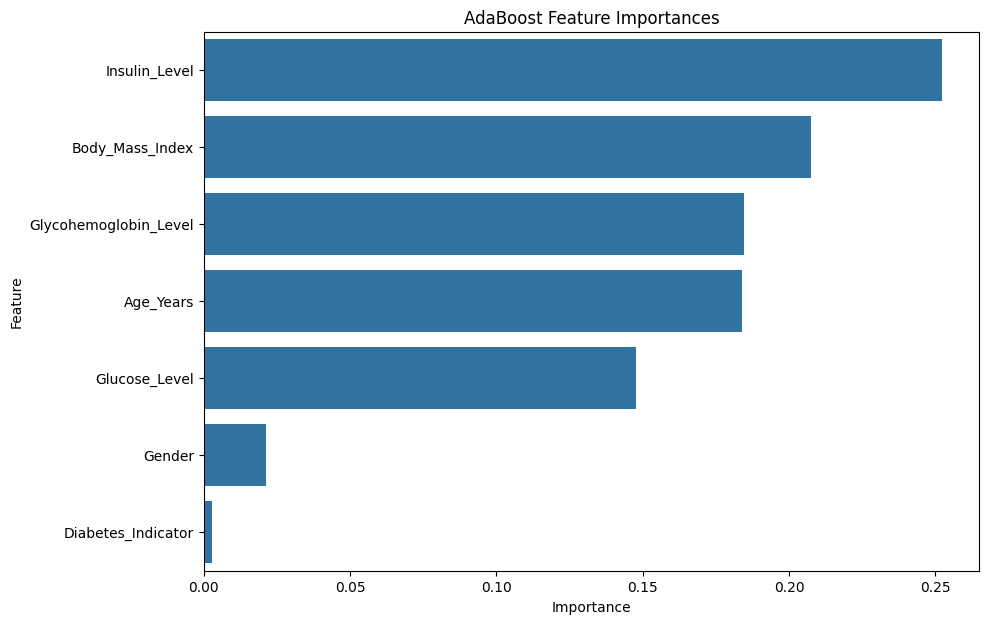

In [62]:
# Visualizar las importancias de características para AdaBoost
plt.figure(figsize=(10,7))
sns.barplot(x='Importance', y='Feature', data=ada_feature_importances_df)
plt.title('AdaBoost Feature Importances')
plt.show()